In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("electricity.csv", parse_dates=['DateTime'], index_col='DateTime', na_values=["?"])
df.head()

,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
DateTime,,,,,,,,,,,,,,,,,
2011-01-11 00:00:00,None,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.0,9.3,600.71,356.0,3159.60,54.32
2011-01-11 00:30:00,None,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.0,11.1,605.42,317.0,2973.01,54.23
2011-01-11 01:00:00,None,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.0,11.1,589.97,311.0,2834.00,54.23
2011-01-11 01:30:00,None,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.0,9.3,585.94,313.0,2725.99,53.47
2011-01-11 02:00:00,None,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.0,11.1,571.52,346.0,2655.64,39.87


# Delet None data

In [24]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38014 entries, 2011-01-11 00:00:00 to 2013-12-31 23:30:00
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Holiday                 38014 non-null  object 
 1   HolidayFlag             38014 non-null  int64  
 2   DayOfWeek               38014 non-null  int64  
 3   WeekOfYear              38014 non-null  int64  
 4   Day                     38014 non-null  int64  
 5   Month                   38014 non-null  int64  
 6   Year                    38014 non-null  int64  
 7   PeriodOfDay             38014 non-null  int64  
 8   ForecastWindProduction  38009 non-null  float64
 9   SystemLoadEA            38012 non-null  float64
 10  SMPEA                   38012 non-null  float64
 11  ORKTemperature          37719 non-null  float64
 12  ORKWindspeed            37715 non-null  float64
 13  CO2Intensity            38007 non-null  float64
 14  Act

In [ ]:
df.nunique()

Holiday                      15
HolidayFlag                   2
DayOfWeek                     7
WeekOfYear                   52
Day                          31
Month                        12
Year                          3
PeriodOfDay                  48
ForecastWindProduction    27254
SystemLoadEA              35300
SMPEA                      7322
ORKTemperature               30
ORKWindspeed                 52
CO2Intensity              22328
ActualWindProduction       1535
SystemLoadEP2             35365
SMPEP2                     7790
dtype: int64

In [ ]:
df.describe()

,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
count,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000
mean,0.037578,2.998355,28.044584,15.707181,6.886789,2012.386577,23.508651,542.871513,4020.753657,62.747428,9.628443,19.209721,479.519761,519.814951,3787.560062,64.181344
std,0.190175,1.998845,15.552428,8.804424,3.566915,0.623780,13.854822,413.725304,860.148265,32.300069,4.439757,9.569069,85.170896,377.879680,842.544909,35.432265
min,0.000000,0.000000,1.000000,1.000000,1.000000,2011.000000,0.000000,0.680000,2183.940000,0.000000,-4.000000,0.000000,0.000000,1.000000,1809.960000,-47.740000
25%,0.000000,1.000000,14.000000,8.000000,4.000000,2012.000000,12.000000,188.927500,3281.780000,45.540000,6.000000,13.000000,421.275000,198.000000,3060.215000,45.800000
50%,0.000000,3.000000,29.000000,16.000000,7.000000,2012.000000,24.000000,440.645000,4105.530000,55.230000,9.000000,18.500000,480.350000,444.000000,3867.220000,55.560000
75%,0.000000,5.000000,43.000000,23.000000,10.000000,2013.000000,36.000000,837.182500,4638.982500,70.320000,13.000000,24.100000,537.540000,792.000000,4427.822500,72.120000
max,1.000000,6.000000,52.000000,31.000000,12.000000,2013.000000,47.000000,1680.000000,6492.910000,587.580000,25.000000,75.900000,842.880000,1769.000000,6309.750000,1000.000000


# Outliers

In [ ]:
df2_ = df[['HolidayFlag',	'DayOfWeek',	'WeekOfYear',	'Day',	'Month',	'Year',	'PeriodOfDay',	'ForecastWindProduction',	'SystemLoadEA',	'SMPEA',	'ORKTemperature',	'ORKWindspeed',	'CO2Intensity',	'ActualWindProduction',	'SystemLoadEP2', 'SMPEP2']]
for i in df2_:
  df2_.sort_values(by=i, ascending=True, na_position='last')
  q1, q3 = np.nanpercentile(df2_[i], [25,75])
  iqr = q3-q1
  lower_bound = q1-(1.5*iqr)
  upper_bound = q3+(1.5*iqr)
  outlier_data = df2_[i][(df2_[i] < lower_bound) | (df2_[i] > upper_bound)] 
  perc = (outlier_data.count()/df2_[i].count())*100
  print('Outliers in %s is %.2f%% with count %.f' %(i, perc, outlier_data.count()))

Outliers in HolidayFlag is 3.76% with count 1416
Outliers in DayOfWeek is 0.00% with count 0
Outliers in WeekOfYear is 0.00% with count 0
Outliers in Day is 0.00% with count 0
Outliers in Month is 0.00% with count 0
Outliers in Year is 0.00% with count 0
Outliers in PeriodOfDay is 0.00% with count 0
Outliers in ForecastWindProduction is 0.00% with count 0
Outliers in SystemLoadEA is 0.00% with count 0
Outliers in SMPEA is 5.45% with count 2054
Outliers in ORKTemperature is 0.15% with count 56
Outliers in ORKWindspeed is 2.37% with count 892
Outliers in CO2Intensity is 0.36% with count 136
Outliers in ActualWindProduction is 0.01% with count 5
Outliers in SystemLoadEP2 is 0.00% with count 0
Outliers in SMPEP2 is 6.13% with count 2309


# Delete outliers

In [18]:
Q1 = np.percentile(df[['HolidayFlag', 'SMPEA', 'ORKTemperature', 'ORKWindspeed', 'CO2Intensity', 'SMPEP2', 'ActualWindProduction']], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df[['HolidayFlag', 'SMPEA', 'ORKTemperature', 'ORKWindspeed', 'CO2Intensity', 'SMPEP2', 'ActualWindProduction']], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

upper = np.where(df[['HolidayFlag', 'SMPEA', 'ORKTemperature', 'ORKWindspeed', 'CO2Intensity', 'SMPEP2', 'ActualWindProduction']] >= (Q3+1.5*IQR))
lower = np.where(df[['HolidayFlag', 'SMPEA', 'ORKTemperature', 'ORKWindspeed', 'CO2Intensity', 'SMPEP2', 'ActualWindProduction']] <= (Q1-1.5*IQR))
 

df.drop(upper[0], inplace = True) 
df.drop(lower[0], inplace = True)
df.describe()

<ipython-input-18-10e0ae10c3fe>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df =df[ ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)].reset_index()


,index,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
count,31248.000000,31248.0,31248.000000,31248.000000,31248.000000,31248.000000,31248.000000,31248.000000,31247.000000,31248.000000,31248.000000,31079.000000,31075.000000,31246.000000,31247.000000,31248.000000,31248.000000
mean,17680.084165,0.0,3.098470,28.178187,15.622984,6.889817,2012.379576,22.337142,522.493001,3902.719109,55.603412,9.761189,18.492811,484.497577,503.602778,3678.039759,56.119638
std,10213.197747,0.0,1.978151,15.210106,8.695621,3.502577,0.617038,14.089361,398.871260,814.380498,15.456268,4.378893,8.651596,85.343230,364.387573,796.958887,16.245425
min,0.000000,0.0,0.000000,1.000000,1.000000,1.000000,2011.000000,0.000000,0.900000,2183.940000,11.310000,-2.000000,0.000000,241.180000,2.000000,1809.960000,11.280000
25%,8941.750000,0.0,1.000000,16.000000,8.000000,4.000000,2012.000000,10.000000,182.825000,3190.730000,44.600000,7.000000,11.100000,425.542500,195.000000,2975.050000,44.787500
50%,17409.500000,0.0,3.000000,29.000000,16.000000,7.000000,2012.000000,21.000000,422.500000,3957.635000,52.800000,10.000000,16.700000,485.795000,431.000000,3745.155000,53.180000
75%,26683.250000,0.0,5.000000,42.000000,23.000000,10.000000,2013.000000,34.000000,800.220000,4546.112500,65.260000,13.000000,24.100000,544.420000,765.000000,4341.052500,66.050000
max,35405.000000,0.0,6.000000,52.000000,31.000000,12.000000,2013.000000,47.000000,1601.800000,6333.520000,101.390000,22.000000,40.700000,719.770000,1588.000000,6014.110000,101.880000


# Plot

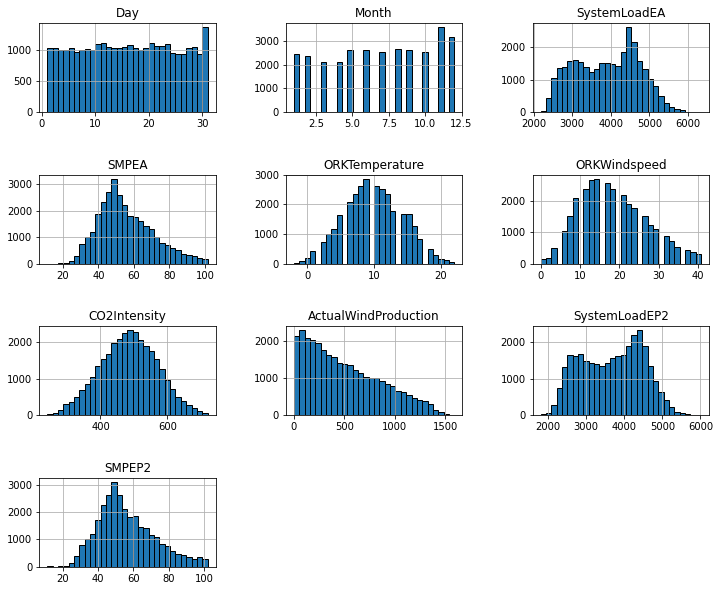

In [19]:
df = df[['Day',	'Month',	'SystemLoadEA',	'SMPEA',	'ORKTemperature',	'ORKWindspeed',	'CO2Intensity',	'ActualWindProduction',	'SystemLoadEP2', 'SMPEP2']]
df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

# Models

# Linear regression model

# 1

In [25]:
df = df[['Day',	'Month',	'SystemLoadEA',	'SMPEA',	'ORKTemperature',	'ORKWindspeed',	'CO2Intensity',	'ActualWindProduction',	'SystemLoadEP2', 'SMPEP2']]
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [26]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X,y, test_size=0.3)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [28]:
linear1 = LinearRegression()
linear1.fit(X1_train, y1_train)
y1_pred = linear1.predict(X1_test)

In [29]:
print("MSE lr: ", metrics.mean_squared_error(y1_test, y1_pred))
print("RMSE lr: ", (metrics.mean_squared_error(y1_test, y1_pred))**(1/2.0))
print("R2_SCORE lr: ", metrics.r2_score(y1_test, y1_pred))
print("MAPE lr: ", metrics.mean_absolute_percentage_error(y1_test, y1_pred))
print("MAE lr: ", metrics.mean_absolute_error(y1_test, y1_pred))

MSE lr:  137.2403978938406
RMSE lr:  11.714964698787641
R2_SCORE lr:  0.47519215731350617
MAPE lr:  0.16067777798481328
MAE lr:  8.836384727487676


# 2

In [30]:
df = df[['Day',	'Month',	'SystemLoadEA',	'SMPEA',	'ORKTemperature',	'ORKWindspeed',	'CO2Intensity',	'ActualWindProduction',	'SystemLoadEP2', 'SMPEP2']]
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X2_train, X2_test, y2_train, y2_test = train_test_split(X,y, test_size=0.3)
st_x= StandardScaler()    
X2_train= st_x.fit_transform(X2_train)    
X2_test= st_x.transform(X2_test)

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [33]:
linear2 = LinearRegression()
linear2.fit(X2_train, y2_train)
y2_pred = linear2.predict(X2_test)

In [34]:
print("MSE lr: ", metrics.mean_squared_error(y2_test, y2_pred))
print("RMSE lr: ", (metrics.mean_squared_error(y2_test, y2_pred))**(1/2.0))
print("R2_SCORE lr: ", metrics.r2_score(y2_test, y2_pred))
print("MAPE lr: ", metrics.mean_absolute_percentage_error(y2_test, y2_pred))
print("MAE lr: ", metrics.mean_absolute_error(y2_test, y2_pred))

MSE lr:  139.37144030781621
RMSE lr:  11.805568190807938
R2_SCORE lr:  0.4801508534314737
MAPE lr:  0.1627448792979886
MAE lr:  8.918483237649028


# 3

In [35]:
df = df[['Day',	'Month',	'SystemLoadEA',	'SMPEA',	'ORKTemperature',	'ORKWindspeed',	'CO2Intensity',	'ActualWindProduction',	'SystemLoadEP2', 'SMPEP2']]
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [36]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
X3_train, X3_test, y3_train, y3_test = train_test_split(X,y, test_size=0.3)

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [38]:
linear3 = make_pipeline(preprocessing.StandardScaler(), LinearRegression())
linear3.fit(X3_train, y3_train)
y3_pred = linear3.predict(X3_test)

In [39]:
print("MSE lr: ", metrics.mean_squared_error(y3_test, y3_pred))
print("RMSE lr: ", (metrics.mean_squared_error(y3_test, y3_pred))**(1/2.0))
print("R2_SCORE lr: ", metrics.r2_score(y3_test, y3_pred))
print("MAPE lr: ", metrics.mean_absolute_percentage_error(y3_test, y3_pred))
print("MAE lr: ", metrics.mean_absolute_error(y3_test, y3_pred))

MSE lr:  135.54056924723983
RMSE lr:  11.64218919478806
R2_SCORE lr:  0.48747349797807193
MAPE lr:  0.16033754603529468
MAE lr:  8.736067167137495


# Ridge model

# 1

In [45]:
df = df[['Day',	'Month',	'SystemLoadEA',	'SMPEA',	'ORKTemperature',	'ORKWindspeed',	'CO2Intensity',	'ActualWindProduction',	'SystemLoadEP2', 'SMPEP2']]
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [46]:
from sklearn.model_selection import train_test_split
a1_train, a1_test, b1_train, b1_test = train_test_split(X,y, test_size=0.3)

In [47]:
from sklearn.linear_model import Ridge
from sklearn import metrics

In [48]:
ridge1 = Ridge(alpha=0.9)
ridge1.fit(a1_train, b1_train)
b1_pred = ridge1.predict(a1_test)

In [49]:
print("MSE ridge: ", metrics.mean_squared_error(b1_test, b1_pred))
print("RMSE ridge: ", (metrics.mean_squared_error(b1_test, b1_pred))**(1/2.0))
print("R2_SCORE ridge: ", metrics.r2_score(b1_test, b1_pred))
print("MAPE ridge: ", metrics.mean_absolute_percentage_error(b1_test, b1_pred))
print("MAE ridge: ", metrics.mean_absolute_error(b1_test, b1_pred))

MSE ridge:  140.74107669462222
RMSE ridge:  11.863434439260084
R2_SCORE ridge:  0.4708661313121847
MAPE ridge:  0.159927841029279
MAE ridge:  8.868463765300104


# 2

In [55]:
df = df[['Day',	'Month',	'SystemLoadEA',	'SMPEA',	'ORKTemperature',	'ORKWindspeed',	'CO2Intensity',	'ActualWindProduction',	'SystemLoadEP2', 'SMPEP2']]
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
a2_train, a2_test, b2_train, b2_test = train_test_split(X,y, test_size=0.3)
st_a= StandardScaler()    
a2_train= st_a.fit_transform(a2_train)    
a2_test= st_a.transform(a2_test)

In [57]:
from sklearn.linear_model import Ridge
from sklearn import metrics

In [58]:
ridge2 = Ridge(alpha=0.9)
ridge2.fit(a2_train, b2_train)
b2_pred = ridge2.predict(a2_test)

In [59]:
print("MSE ridge: ", metrics.mean_squared_error(b2_test, b2_pred))
print("RMSE ridge: ", (metrics.mean_squared_error(b2_test, b2_pred))**(1/2.0))
print("R2_SCORE ridge: ", metrics.r2_score(b2_test, b2_pred))
print("MAPE ridge: ", metrics.mean_absolute_percentage_error(b2_test, b2_pred))
print("MAE ridge: ", metrics.mean_absolute_error(b2_test, b2_pred))

MSE ridge:  140.2042845457735
RMSE ridge:  11.84078901702811
R2_SCORE ridge:  0.4771743113970922
MAPE ridge:  0.16244202875016187
MAE ridge:  8.93016559201626


# 3

In [65]:
df = df[['Day',	'Month',	'SystemLoadEA',	'SMPEA',	'ORKTemperature',	'ORKWindspeed',	'CO2Intensity',	'ActualWindProduction',	'SystemLoadEP2', 'SMPEP2']]
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
a3_train, a3_test, b3_train, b3_test = train_test_split(X,y, test_size=0.3)

In [67]:
from sklearn.linear_model import Ridge
from sklearn import metrics

In [68]:
ridge3 = make_pipeline(preprocessing.StandardScaler(), Ridge())
ridge3.fit(a3_train, b3_train)
b3_pred = ridge3.predict(a3_test)

In [69]:
print("MSE ridge: ", metrics.mean_squared_error(b3_test, b3_pred))
print("RMSE ridge: ", (metrics.mean_squared_error(b3_test, b3_pred))**(1/2.0))
print("R2_SCORE ridge: ", metrics.r2_score(b3_test, b3_pred))
print("MAPE ridge: ", metrics.mean_absolute_percentage_error(b3_test, b3_pred))
print("MAE ridge: ", metrics.mean_absolute_error(b3_test, b3_pred))

MSE ridge:  139.12497476569558
RMSE ridge:  11.795125042393387
R2_SCORE ridge:  0.47514691804860953
MAPE ridge:  0.1598333671430828
MAE ridge:  8.860215356846874


# Polynomial regression model

# degree 2

In [80]:
df = df[['Day',	'Month',	'SystemLoadEA',	'SMPEA',	'ORKTemperature',	'ORKWindspeed',	'CO2Intensity',	'ActualWindProduction',	'SystemLoadEP2', 'SMPEP2']]
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [81]:
from sklearn.model_selection import train_test_split
c_train, c_test, d_train, d_test = train_test_split(X,y, test_size=0.3)

In [82]:
from sklearn.preprocessing import PolynomialFeatures

In [83]:
polyRegressor = PolynomialFeatures(degree=2, include_bias=False)
c_train_poly = polyRegressor.fit_transform(c_train)
c_test_poly = polyRegressor.fit_transform(c_test)
poly = LinearRegression()
poly.fit(c_train_poly, d_train)
d_pred = poly.predict(c_test_poly)

In [84]:
print("MSE poly: ", metrics.mean_squared_error(d_test, d_pred))
print("RMSE poly: ", (metrics.mean_squared_error(d_test, d_pred))**(1/2.0))
print("R2_SCORE poly: ", metrics.r2_score(d_test, d_pred))
print("MAPE poly: ", metrics.mean_absolute_percentage_error(d_test, d_pred))
print("MAE poly: ", metrics.mean_absolute_error(d_test, d_pred))

MSE poly:  131.1781977957833
RMSE poly:  11.453305103584
R2_SCORE poly:  0.5029954087041034
MAPE poly:  0.15655947075392065
MAE poly:  8.654032755316303


# degree3

In [ ]:
df = df[['Day',	'Month',	'SystemLoadEA',	'SMPEA',	'ORKTemperature',	'ORKWindspeed',	'CO2Intensity',	'ActualWindProduction',	'SystemLoadEP2', 'SMPEP2']]
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
c_train, c_test, d_train, d_test = train_test_split(X,y, test_size=0.3)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
polyRegressor = PolynomialFeatures(degree=3, include_bias=False)
c1_train_poly = polyRegressor.fit_transform(c_train)
c1_test_poly = polyRegressor.fit_transform(c_test)
poly = LinearRegression()
poly.fit(c1_train_poly, d_train)
d1_pred = poly.predict(c1_test_poly)

In [ ]:
print("MSE poly: ", metrics.mean_squared_error(d_test, d1_pred))
print("RMSE poly: ", (metrics.mean_squared_error(d_test, d1_pred))**(1/2.0))
print("R2_SCORE poly: ", metrics.r2_score(d_test, d1_pred))
print("MAPE poly: ", metrics.mean_absolute_percentage_error(d_test, d1_pred))
print("MAE poly: ", metrics.mean_absolute_error(d_test, d1_pred))

MSE poly:  582.6576511425535
RMSE poly:  24.138302573763415
R2_SCORE poly:  0.5251451931074573
MAPE poly:  101195102625621.58
MAE poly:  13.583698928793996


# RandomForest

In [90]:
df = df[['Day',	'Month',	'SystemLoadEA',	'SMPEA',	'ORKTemperature',	'ORKWindspeed',	'CO2Intensity',	'ActualWindProduction',	'SystemLoadEP2', 'SMPEP2']]
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [92]:
from sklearn.ensemble import RandomForestRegressor

In [93]:
random_Forest = RandomForestRegressor(min_samples_split=3)
random_Forest.fit(X_train, y_train)
predict= random_Forest.predict(X_test)

In [94]:
print("MSE random: ", metrics.mean_squared_error(y_test, predict))
print("RMSE random: ", (metrics.mean_squared_error(y_test, predict))**(1/2.0))
print("R2_SCORE random: ", metrics.r2_score(y_test, predict))
print("MAPE random: ", metrics.mean_absolute_percentage_error(y_test, predict))
print("MAE random: ", metrics.mean_absolute_error(y_test, predict))

MSE random:  63.56655023462293
RMSE random:  7.972863364853491
R2_SCORE random:  0.7607863175094456
MAPE random:  0.09859348975981207
MAE random:  5.363920185476258


# SVM

In [85]:
df = df[['Day',	'Month',	'SystemLoadEA',	'SMPEA',	'ORKTemperature',	'ORKWindspeed',	'CO2Intensity',	'ActualWindProduction',	'SystemLoadEP2', 'SMPEP2']]
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [86]:
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)

In [87]:
from sklearn.svm import SVR

In [88]:
svm = SVR(kernel='rbf')
svm.fit(X_train, y_train)
svr_predict= svm.predict(X_test)

In [89]:
print("MSE svm: ", metrics.mean_squared_error(y_test, svr_predict))
print("RMSE svm: ", (metrics.mean_squared_error(y_test, svr_predict))**(1/2.0))
print("R2_SCORE svm: ", metrics.r2_score(y_test, svr_predict))
print("MAPE svm: ", metrics.mean_absolute_percentage_error(y_test, svr_predict))
print("MAE svm: ", metrics.mean_absolute_error(y_test, svr_predict))

MSE svm:  137.10987785640162
RMSE svm:  11.709392719368568
R2_SCORE svm:  0.48407806480995097
MAPE svm:  0.1425991771180566
MAE svm:  8.29216863315598
